## trained model on TID2013

In [2]:
from scipy import stats



In [3]:
! python test_cross_dataset.py --help

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
usage: test_cross_dataset.py [-h] [--dist_dir DIST_DIR] [--ref_dir REF_DIR]
                             [--names_info NAMES_INFO]
                             [--model_file MODEL_FILE] [--save_path SAVE_PATH]
                             [--patching_method PATCHING_METHOD]

PyTorch WaDIQaM-FR test on the whole cross dataset

optional arguments:
  -h, --help            show this help message and exit
  --dist_dir DIST_DIR   distorted images dir.
  --ref_dir REF_DIR     reference images dir.
  --names_info NAMES_INFO
                        .mat file that includes image names in the dataset.
  --model_file MODEL_FILE
                        model file (default: checkpoints/WaDIQaM-FR-
                        KADID-10K-EXP1000-5-lr=0.0001-bs=4)
  --save_path SAVE_PATH
                        save path (default: scores)
  --patching_method PATCHING_METHOD
                        random or variance


## test on LIVE

In [1]:
%%time
! python test_cross_dataset.py --patching_method=random  --dist_dir=databaserelease2  --model_file=SAVED_MODELS/randomPatches-WaDIQaM-NR-TID2013-EXP41-5-lr=0.0001-bs=4 --names_info=LIVEfullinfo.mat

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
500 @@@@@@@@@@@@@@@@@@@@@@@@@@ ['wn/img49.bmp', 'wn/img139.bmp', 'jpeg/img166.bmp', 'fastfading/img71.bmp', 'gblur/img98.bmp', 'fastfading/img4.bmp', 'wn/img108.bmp', 'jpeg/img21.bmp', 'jpeg/img8.bmp', 'wn/img93.bmp', 'jp2k/img55.bmp', 'jpeg/img225.bmp', 'wn/img40.bmp', 'gblur/img127.bmp', 'wn/img56.bmp', 'fastfading/img52.bmp', 'fastfading/img134.bmp', 'jpeg/img86.bmp', 'fastfading/img131.bmp', 'jp2k/img13.bmp', 'jpeg/img99.bmp', 'jpeg/img214.bmp', 'jp2k/img143.bmp', 'jp2k/img108.bmp', 'jp2k/img125.bmp', 'wn/img47.bmp', 'gblur/img139.bmp', 'jpeg/img70.bmp', 'jpeg/img100.bmp', 'jpeg/img11.bmp', 'jpeg/img176.bmp', 'fastfading/img67.bmp', 'wn/img121.bmp', 'jpeg/img215.bmp', 'jpeg/img37.bmp', 'fastfading/img94.bmp', 'jp2k/img116.bmp', 'jp2k/img150.bmp', 'jp2k/img91.bmp', 'jpeg/img207.bmp', 'fastfading/img132.bmp', 'gblur/img97.bmp', 'wn/img18.bmp', 'jp2k/img78.bmp', 'jpeg/img167.bmp', 'wn/img45.bmp', 'fastfading/img86.bmp', 'jpeg/

In [19]:
import numpy as np
predicts = np.load('scores.npy')
predicts = 1 - predicts

In [20]:
import h5py

Info = h5py.File("LIVEfullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [21]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [22]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [23]:
len(predicts)

500

In [24]:
len(mos_)

500

In [25]:

stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.5908106512426049, pvalue=2.2501623770231487e-48)

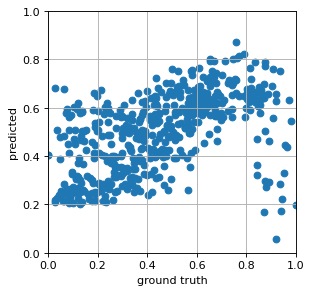

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

## test on TID2013

In [27]:
! python test_cross_dataset.py --patching_method=random  --dist_dir=distorted_images  --model_file=SAVED_MODELS/randomPatches-WaDIQaM-NR-TID2013-EXP41-5-lr=0.0001-bs=4 --names_info=TID2013fullinfo.mat

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
*************************88
500 @@@@@@@@@@@@@@@@@@@@@@@@@@ ['i23_03_2.bmp', 'i06_16_5.bmp', 'i18_14_4.bmp', 'i04_13_4.bmp', 'i09_06_2.bmp', 'i08_15_2.bmp', 'i17_01_2.bmp', 'i02_13_3.bmp', 'i09_19_3.bmp', 'i08_23_4.bmp', 'i20_08_2.bmp', 'i09_04_3.bmp', 'i04_19_5.bmp', 'i19_15_1.bmp', 'i25_12_2.bmp', 'i15_20_3.bmp', 'i15_04_5.bmp', 'I16_01_1.bmp', 'i04_12_3.bmp', 'i25_21_5.bmp', 'i25_23_2.bmp', 'i02_17_4.bmp', 'i04_22_4.bmp', 'i25_17_3.bmp', 'i24_23_3.bmp', 'i17_15_2.bmp', 'i02_13_2.bmp', 'i19_08_3.bmp', 'i22_08_2.bmp', 'i18_24_5.bmp', 'i20_12_1.bmp', 'i03_23_3.bmp', 'i01_14_5.bmp', 'i23_11_5.bmp', 'i08_24_4.bmp', 'i11_06_1.bmp', 'i21_03_1.bmp', 'i05_01_5.bmp', 'i10_12_2.bmp', 'i21_18_3.bmp', 'i12_14_3.bmp', 'i06_23_5.bmp', 'i19_02_4.bmp', 'i18_01_4.bmp', 'i07_06_1.bmp', 'i14_02_2.bmp', 'i22_15_4.bmp', 'i17_12_2.bmp', 'i10_17_1.bmp', 'i19_07_1.bmp', 'i02_23_2.bmp', 'i01_23_1.bmp', 'i13_01_4.bmp', 'i22_16_3.bmp', 'i20_18_4.bmp', 'i07_09_4.bmp', 'i07_22_5.bmp

In [33]:
import numpy as np
predicts = np.load('scores.npy')

In [34]:
import h5py

Info = h5py.File("TID2013fullinfo.mat", 'r')
scale = Info['subjective_scores'][0, :].max()
mos = Info['subjective_scores'][0, :] / scale #
mos_std = Info['subjective_scoresSTD'][0, :] / scale

In [35]:
rands_index = []
with open("tmp_imgIndex.txt", "r") as f:
  for line in f:
    rands_index.append(int(line.strip()))

In [36]:
mos_ = []
mos_std_ = []
for i in rands_index:
    mos_.append(mos[i])
    mos_std_.append(mos_std[i])

In [37]:
# predicts = 1 - predicts
len(predicts)

500

In [38]:
predicts[:10]

array([0.58442259, 0.63849211, 0.77246761, 0.56890386, 0.6847046 ,
       0.62799209, 0.66846031, 0.55869317, 0.68405795, 0.76645446])

In [39]:
mos_[:10]

[0.5782176763063309,
 0.5737071839363264,
 0.5775578747180942,
 0.480076348469496,
 0.5977719221156899,
 0.4068979761002122,
 0.7222512541081659,
 0.4697468496553368,
 0.6259978459418738,
 0.7623757847272565]

In [40]:
len(mos_)

500

In [41]:
stats.spearmanr(mos_, predicts)

SpearmanrResult(correlation=0.7257892972884973, pvalue=6.088230011564245e-83)

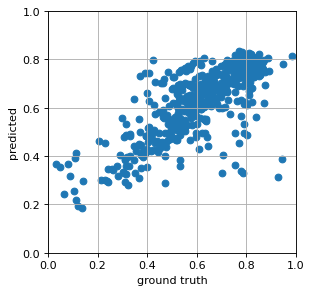

In [42]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(4,4), dpi=80)

# fig, ax = plt.subplots(figsize=(12, 12))

plt.xlabel("ground truth")
plt.ylabel("predicted")

plt.grid()

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.scatter(mos_, predicts)
plt.show()

## test on flipped images

In [43]:
from argparse import ArgumentParser
import torch
from torch import nn
import torch.nn.functional as F
from PIL import Image
from main import RandomCropPatches, VarianceThresholdPatchSelection, NRnet
import numpy as np
import h5py, os , random

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NRnet(weighted_average=True).to(device)

model.load_state_dict(torch.load("SAVED_MODELS/randomPatches-WaDIQaM-NR-TID2013-EXP41-5-lr=0.0001-bs=4"))

<All keys matched successfully>

In [45]:
import glob

im_names = glob.glob('flipped_test/*')
im_names

['flipped_test\\a.bmp',
 'flipped_test\\a1.png',
 'flipped_test\\b.bmp',
 'flipped_test\\b1.png',
 'flipped_test\\c.bmp',
 'flipped_test\\c1.png',
 'flipped_test\\d.bmp',
 'flipped_test\\d1.png',
 'flipped_test\\e.bmp',
 'flipped_test\\e1.png']

In [46]:
model.eval()
scores = []   
with torch.no_grad():
        for i in range(len(im_names)):
            im = Image.open(os.path.join( im_names[i])).convert('RGB')
           
            data = RandomCropPatches(im)
            
            dist_patches = data.unsqueeze(0).to(device)
            

            score = model((dist_patches))
            scores.append(score.item())


            
 

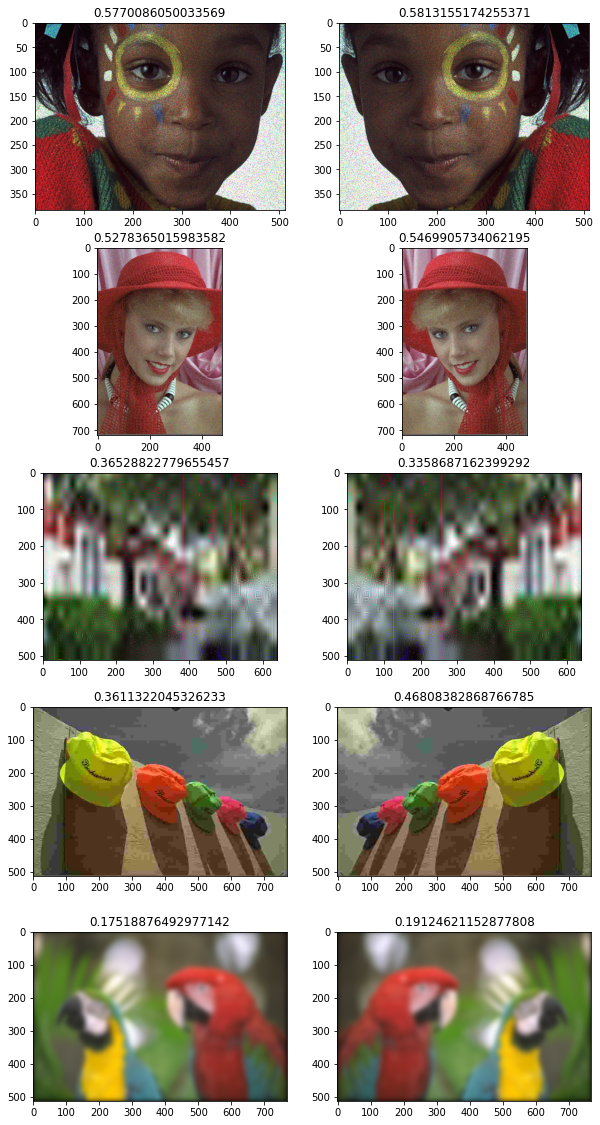

In [47]:
import cv2
f, axarr = plt.subplots(5,2 , figsize=(10, 20))
for i in range(len(im_names)//2):
    a = cv2.imread(im_names[i*2])
    b = cv2.imread(im_names[i*2+1])
    a = cv2.cvtColor(a, cv2.COLOR_RGB2BGR)
    b = cv2.cvtColor(b, cv2.COLOR_RGB2BGR)
    axarr[i,0].imshow(a)
    axarr[i,0].set_title(str(scores[i*2])) 
    axarr[i,1].imshow(b)
    axarr[i,1].set_title(str(scores[i*2+1])) 
  